<a href="https://www.kaggle.com/code/kparthiban007/car-type-analysis?scriptVersionId=220441380" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="background-color:#FFEBCD; color:#666; padding:15px; text-align:center; font-size:25px; border-radius:25px;"> Car Type Analysis</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("/kaggle/input/automobile/Automobile.csv")
df.head(5)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [3]:
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [4]:
df.duplicated().sum()

0

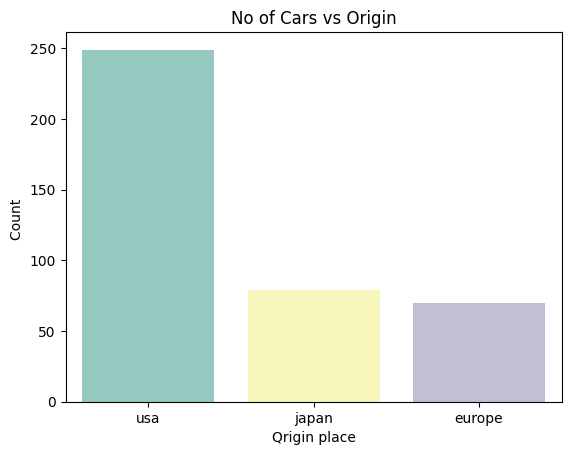

In [5]:
sns.countplot(x=df['origin'],palette='Set3')
plt.xlabel("Qrigin place")
plt.ylabel("Count ")
plt.title("No of Cars vs Origin")
plt.show()

<Axes: >

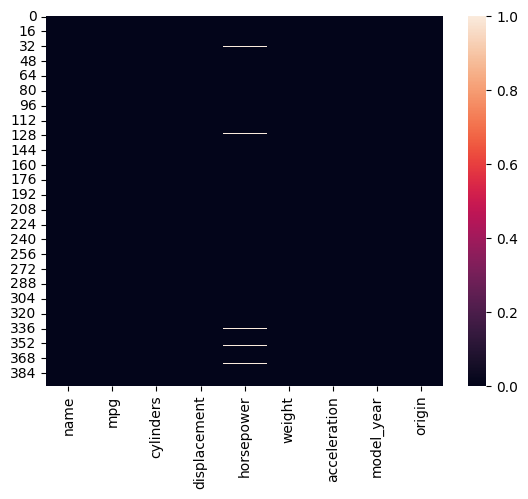

In [6]:
sns.heatmap(df.isna())

In [7]:
impute = df['horsepower'].median()
df['horsepower'] = df['horsepower'].fillna(impute)

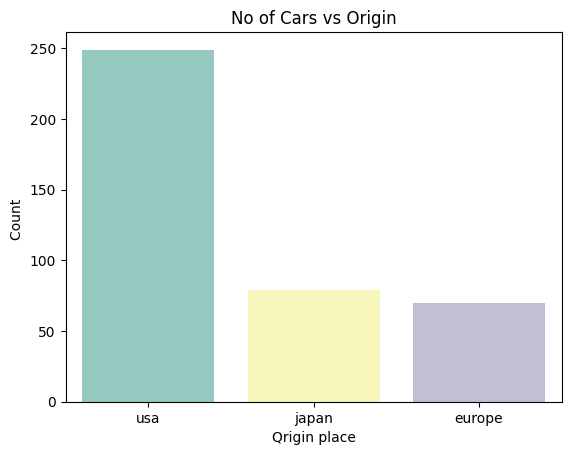

In [8]:
sns.countplot(x=df['origin'],palette='Set3')
plt.xlabel("Qrigin place")
plt.ylabel("Count ")
plt.title("No of Cars vs Origin")
plt.show()

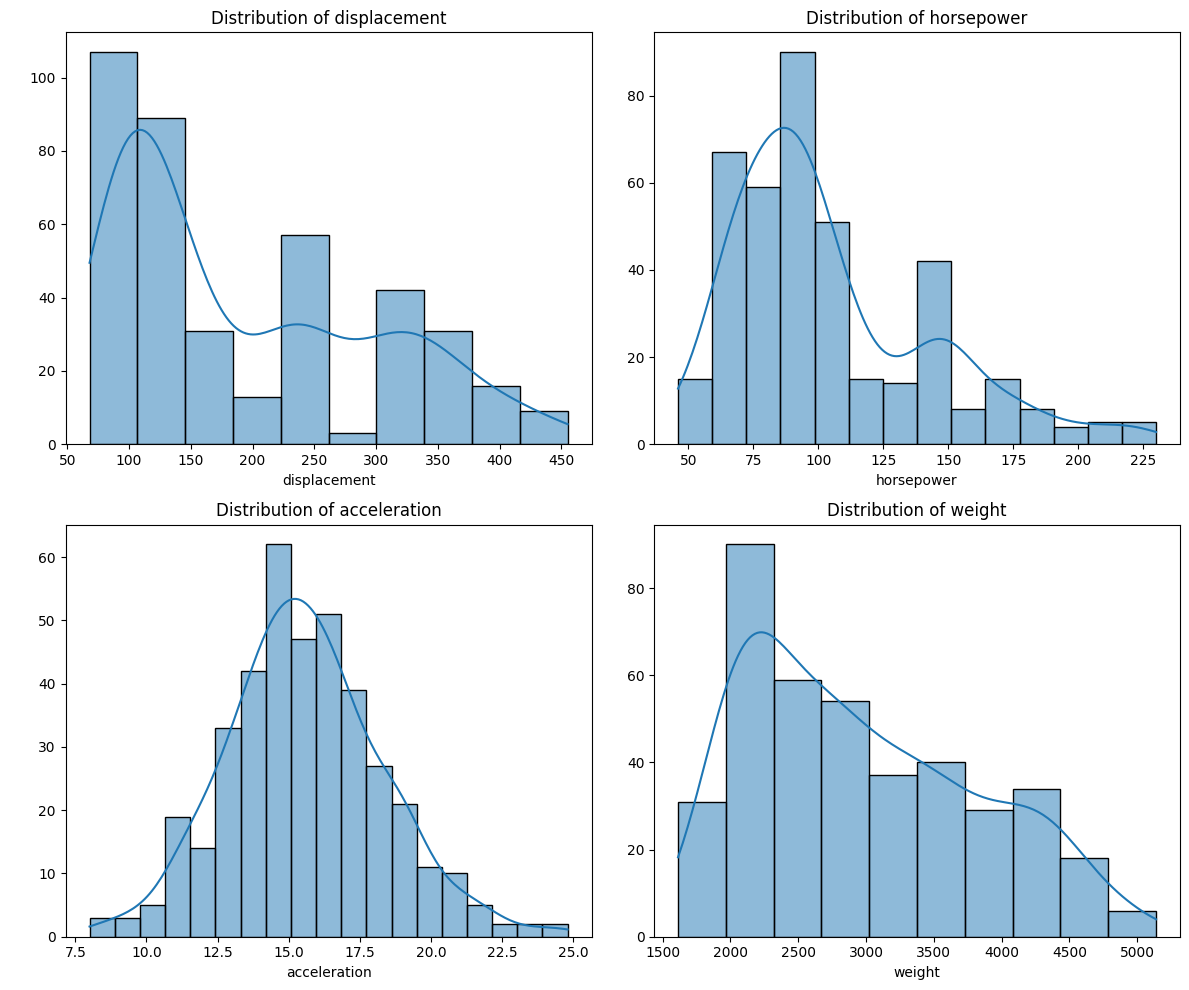

In [9]:
i = 0
plt.figure(figsize=(12,10))
def hist_plot(col):
    global i
    i+=1
    plt.subplot(2,2,i)
    sns.histplot(x=df[col],kde=True)
    plt.xlabel(col)
    plt.ylabel(" ")
    plt.title(f"Distribution of {col}")



for columns in ['displacement','horsepower','acceleration','weight']:
    hist_plot(columns)

plt.tight_layout()

plt.show()

In [10]:
df['model_year'].value_counts()

model_year
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['origin'] = encoder.fit_transform(df['origin'])


In [12]:
numeric_columns = df.select_dtypes(exclude="object").columns
numeric_columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

Text(0.5, 1.0, 'Correlation of Car Data')

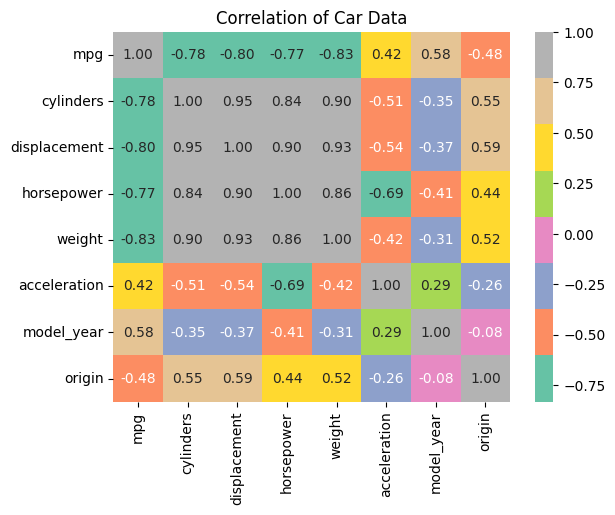

In [13]:
dff = df[numeric_columns]
corr = dff.corr()
sns.heatmap(corr,annot =True,fmt=".2f",cmap="Set2")
plt.title("Correlation of Car Data")